In [8]:
import os
import random
import cv2
from matplotlib import pyplot as plt
from ultralytics import YOLO


0: 416x640 2 cars, 25.9ms
1: 416x640 1 car, 25.9ms
2: 416x640 8 cars, 2 buss, 3 persons, 2 Traffic_lights, 1 Traffic_sign, 25.9ms
Speed: 2.2ms preprocess, 25.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)


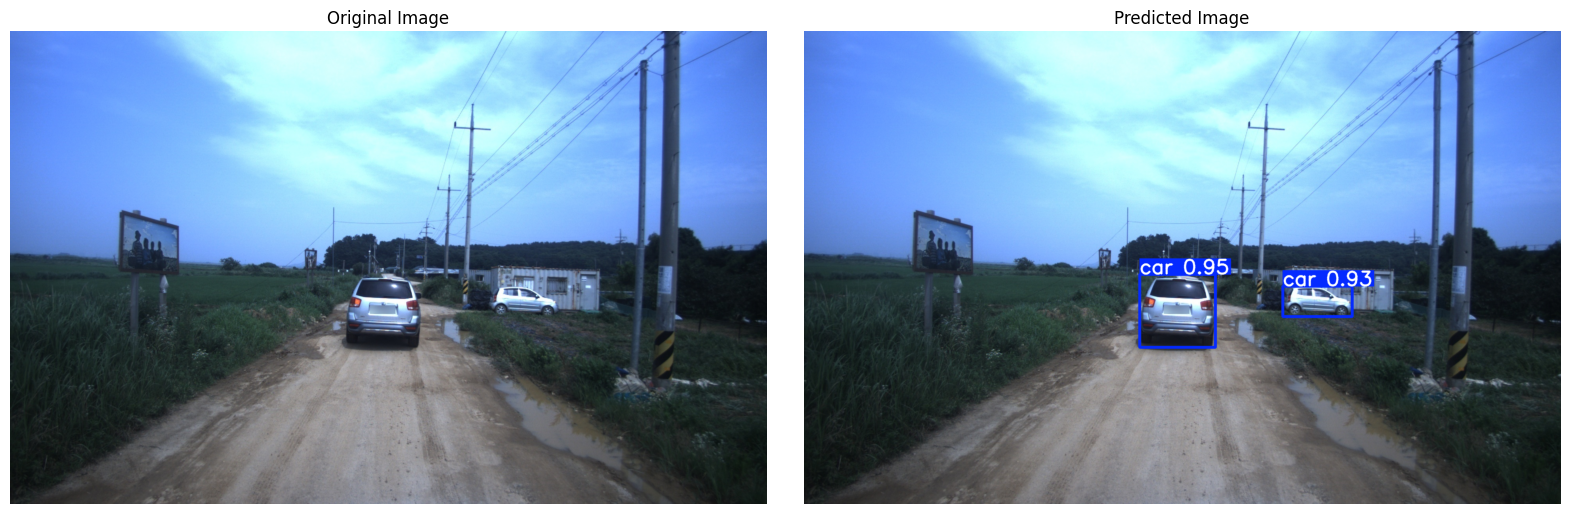

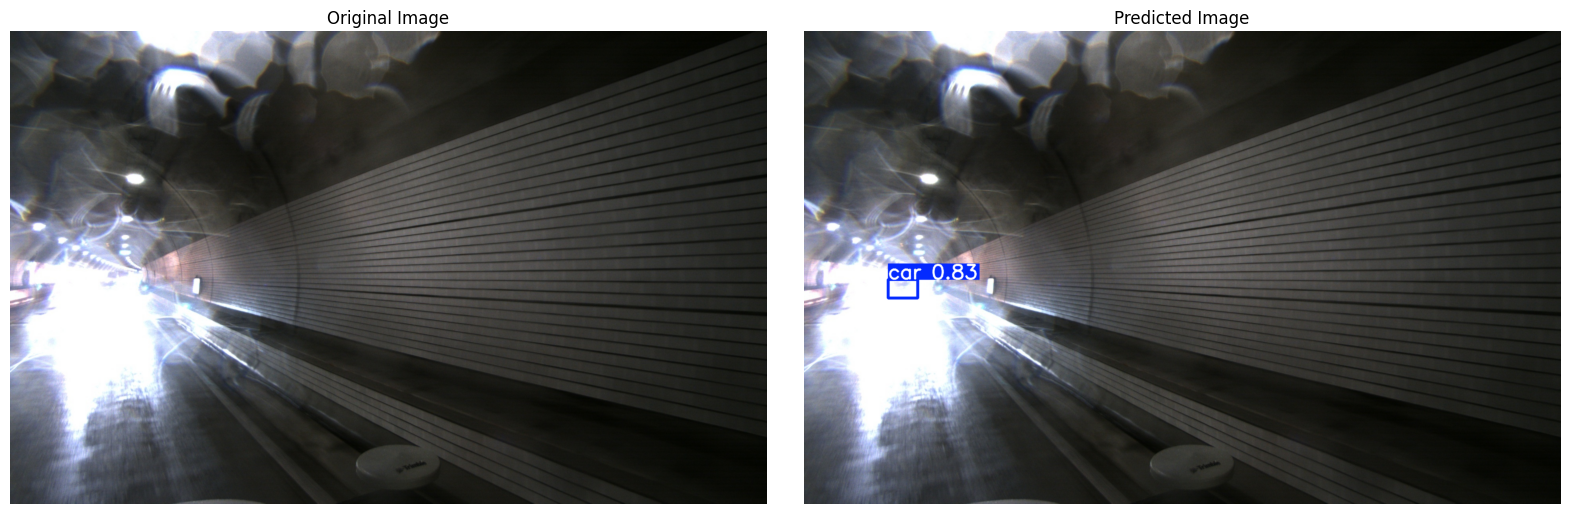

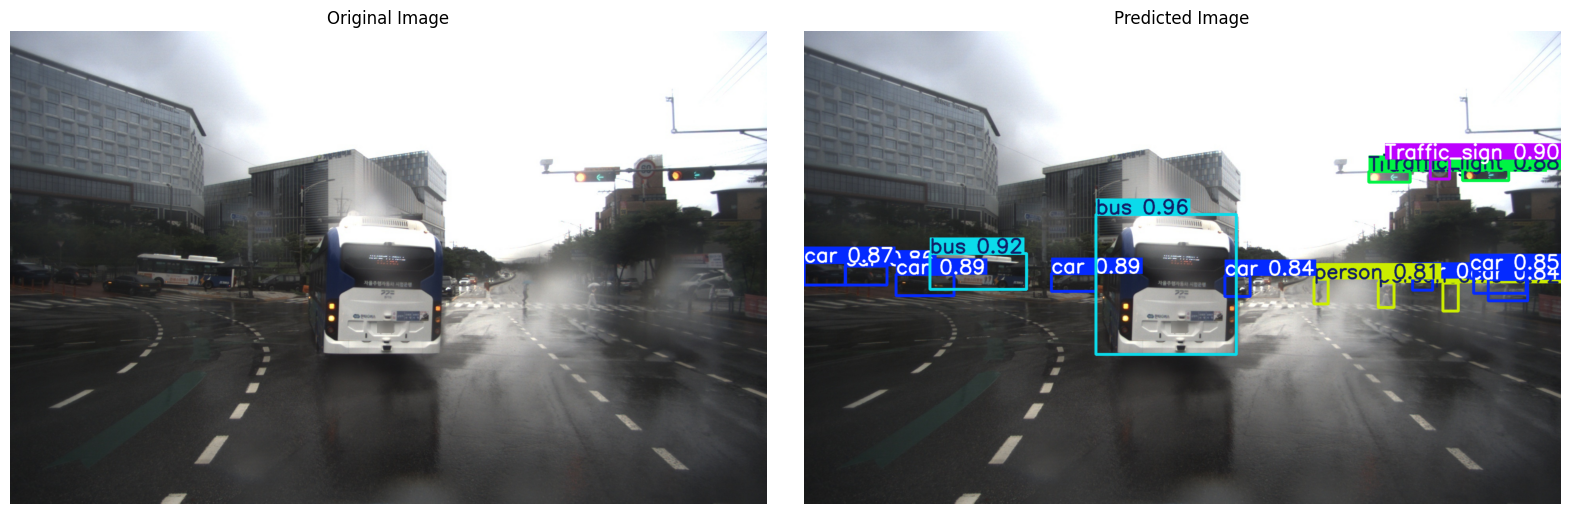

In [9]:
test_img_path = 'dataset/Preprocessed_2DBB/test/images'
all_files = os.listdir(test_img_path)

random_files = random.sample(all_files, 3)
random_files_paths = [os.path.join(test_img_path, file) for file in random_files]

model = YOLO('runs/detect/train/weights/best.pt')

results = model(
    random_files_paths,
    save=False,
    conf=0.7
)

for img_path, result in zip(random_files_paths, results):
    original_img = cv2.imread(img_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    
    detected_img = result.plot()
    detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(detected_img)
    plt.title('Predicted Image')
    plt.axis('off')
    
    plt.subplots_adjust(wspace=0.05, hspace=0)
    plt.show()
